# This notebook is meant to create functions for plotting 

Goal is then to add them to the classes or as checks that everything is well

In [2]:
%load_ext autoreload
%matplotlib inline

In [3]:
import os
import glob
import sys
import yaml

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tempest import casestudy
from tempest import grid
from tempest import joint_distrib
from tempest import handler

settings_path = 'settings/tropics20.yaml'

In [4]:
# Instantiate CaseStudy by passing the settings. 
# Should also create appropriate directories
hdlr = handler.Handler(settings_path)
cs = casestudy.CaseStudy(hdlr, verbose = True)
gr = grid.Grid(hdlr, verbose = False, overwrite = False)
# jd = joint_distrib.JointDistribution(gr)

if __name__ == '__main__':
    # print("Loaded Configuration:")
    # for key, value in settings.items():
    #     print(f"{key}: {value}")
    
    #gr.compute_funcs_for_var_id()
    pass

Found json file at {json_path}, loading it..
Data loaded from /homedata/mcarenso/tempest/DYAMOND_SAM_Tropics20/var_id_days_i_t.json
LWNTA
day:      (#t)  t_i-t_f
16-08-01: (47) 1-47
16-08-02: (48) 48-95
16-08-03: (48) 96-143
16-08-04: (48) 144-191
16-08-05: (48) 192-239
16-08-06: (48) 240-287
16-08-07: (48) 288-335
16-08-08: (48) 336-383
16-08-09: (48) 384-431
16-08-10: (48) 432-479
16-08-11: (48) 480-527
16-08-12: (48) 528-575
16-08-13: (48) 576-623
16-08-14: (48) 624-671
16-08-15: (48) 672-719
16-08-16: (48) 720-767
16-08-17: (48) 768-815
16-08-18: (48) 816-863
16-08-19: (48) 864-911
16-08-20: (48) 912-959
16-08-21: (48) 960-1007
16-08-22: (48) 1008-1055
16-08-23: (48) 1056-1103
16-08-24: (48) 1104-1151
16-08-25: (48) 1152-1199
16-08-26: (48) 1200-1247
16-08-27: (48) 1248-1295
16-08-28: (48) 1296-1343
16-08-29: (48) 1344-1391
16-08-30: (48) 1392-1439
16-08-31: (48) 1440-1487
16-09-01: (48) 1488-1535
16-09-02: (48) 1536-1583
16-09-03: (48) 1584-1631
16-09-04: (48) 1632-1679
16-09-05: 

In [5]:
jd = joint_distrib.JointDistribution(gr, nd=5, storm_tracking=True)

/data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOBAL/2016/FileTracking/TOOCAN-GLOBAL-20160901-20160910.dat.gz
/data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOBAL/2016/FileTracking/TOOCAN-GLOBAL-20160801-20160831.dat.gz


Convective only
figure size = 15 2.5
Mostly convective


figure size = 15 2.5
Mostly mesoscale
figure size = 15 2.5
Mesoscale only
figure size = 15 2.5


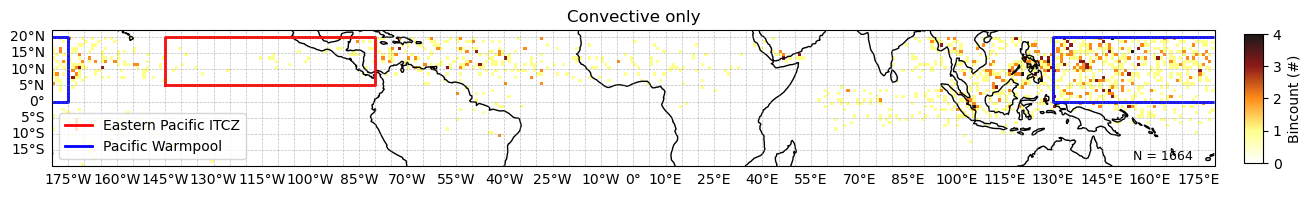

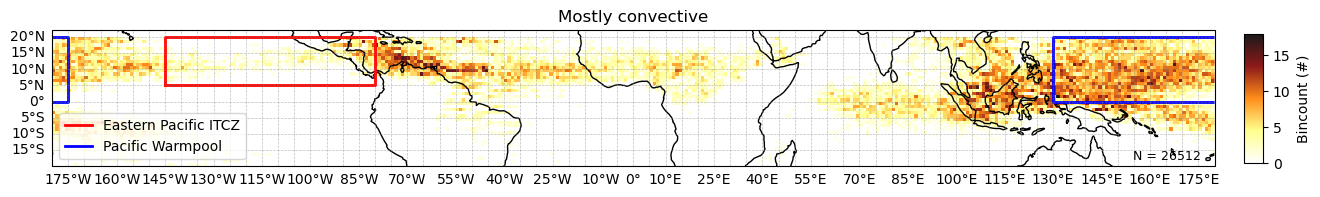

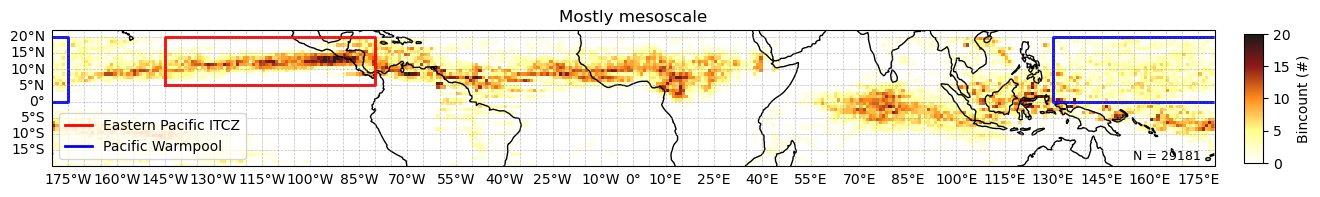

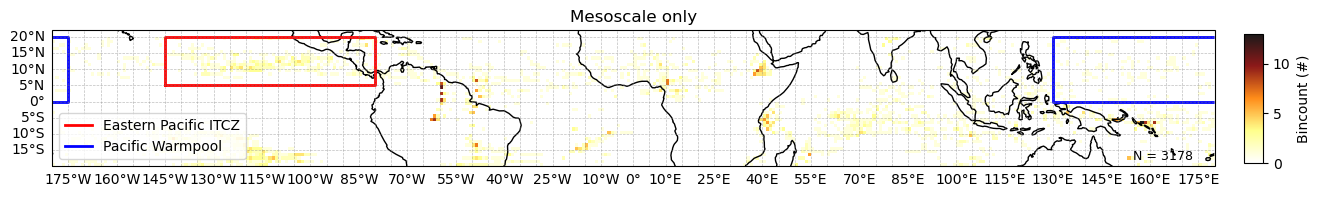

In [6]:
import cartopy.crs as ccrs
%matplotlib inline
# Show frequency maps of extremes in the 4 regions (normalized by total bincount in mask?)
jd.make_mask()

mask_all = jd.mask_branch1_90, jd.mask_coloc_c_90, jd.mask_coloc_ac_90, jd.mask_branch2_90
mask_names = 'Convective only','Mostly convective','Mostly mesoscale','Mesoscale only'
mask_labels = 'conv','mostlyconv','mostlyacc','acc'

for mask,mask_name,mask_label in zip(mask_all,mask_names,mask_labels):
    
    print(mask_name)
    mask_yxt = jd.get_mask_yxt_from_mask_jdist(mask)
    ax = jd.make_map(mask_yxt)
    lon_min, lon_max = 215, 280 #gr.lon_slice.start , gr.lon_slice.stop
    lat_min, lat_max = 5, 20#gr.lat_slice.start, gr.lat_slice.stop
    ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
                [lat_min, lat_min, lat_max, lat_max, lat_min],
                color='red', linestyle='-', linewidth=2, transform=ccrs.PlateCarree(), label = "Eastern Pacific ITCZ")
    lon_min, lon_max = 130, 185 #gr.lon_slice.start , gr.lon_slice.stop
    lat_min, lat_max = 0, 20#gr.lat_slice.start, gr.lat_slice.stop
    ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
                [lat_min, lat_min, lat_max, lat_max, lat_min],
                color='blue', linestyle='-', linewidth=2, transform=ccrs.PlateCarree(), label = "Pacific Warmpool")
    ax.legend()
    
    ax.set_title(mask_name)

    # plt.savefig(os.path.join(figdir,'map_bincount_%s_extremes.pdf'%(mask_label)),bbox_inches='tight')
    # plt.savefig(os.path.join(figdir,'map_bincount_%s_extremes.png'%(mask_label)),bbox_inches='tight')

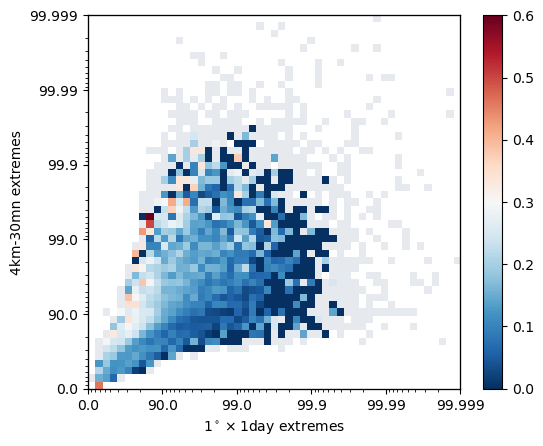

In [7]:
data, noise = jd.get_mcs_bin_fraction()
jd.plot_data(data, noise, branch=False)

In [8]:
A_max = jd.storm_attributes_on_jdist(['surfmaxkm2_172Wm2'], ['mean'])
A_max = A_max[0][0,0]

012

34567891011121314151617181920212223242526272829303132333435363738394041424344454647484950

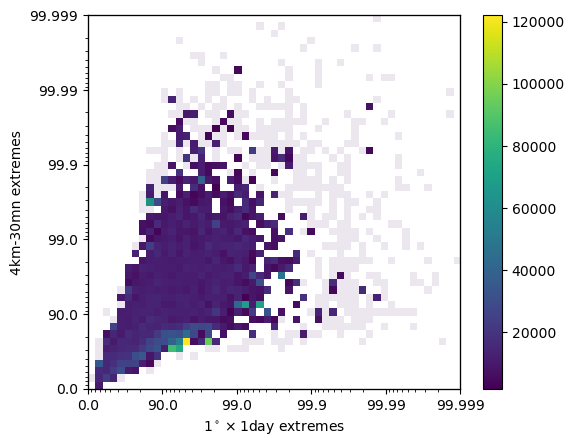

In [9]:
jd.plot_data(A_max, noise, cmap = plt.cm.viridis, branch=False)

# Old
## MCS Growth rate computation 
#### We've simply computed for each mcs its growth rate with the function growth_rate before adding the value to the instance of each mcs, which allows us to plot it on the Y just as the other variables. 
TODO : think about a cleaner way to add this inside the project structure. Either compute all interesting toocan attributes propagated on the map and saving them into netcdf (so one would have to call the grid.compute_funcs_for_var). This has a bigger computation cost but is certainly more robust and results will be callable instantly (same issue that makes us have to recompute jd every time)

In [10]:
i_label = 30
surf_km2 = jd.storms[i_label].surfmaxkm2_172Wm2
surf_pix2 = np.max(jd.storms[i_label].clusters.surfPix_172Wm2)
print(surf_km2/surf_pix2)

16.0


In [11]:
def growth_rate(mcs_list, label_list):
    def idx_by_label(labels, label_list):
        idxs = [label_list.index(label) for label in labels]
        return idxs
    
    def calculate_first_derivative(time_series, time_step = 30):
        """
        Calculate the first derivative of a time series using the central difference method.

        Parameters:
        time_series (np.array): A 1D numpy array representing the surface of an object over time.
        time_step (float): The time interval between successive samples in the time series.

        Returns:
        derivative (np.array): A 1D numpy array representing the first derivative of the time series.
        """
        n = len(time_series)
        derivative = np.zeros(n)

        # Calculate the central difference method
        for i in range(1, n-1):
            derivative[i] = (time_series[i+1] - time_series[i-1]) / (2*time_step)

        # Apply forward difference at the start and backward difference at the end
        derivative[0] = (time_series[1] - time_series[0]) / time_step
        derivative[n-1] = (time_series[n-1] - time_series[n-2]) / time_step

        # Robustness check for stability
        derivative[np.isnan(derivative)] = 0.0
        derivative[np.isinf(derivative)] = 0.0

        return derivative
    
    def classify_derivative(derivative):
        """
        Classify a derivative array based on its positiveness.

        Parameters:
        derivative (np.array): A 1D numpy array representing the derivative of a time series.

        Returns:
        classification (int): A flag indicating the classification of the derivative.
        """
        # Step 1: Calculate the array of positiveness flags
        positiveness = np.zeros_like(derivative)
        positiveness[derivative >= 0] = 1  # positive derivative
        positiveness[derivative < 0] = -1  # negative derivative

        # Step 2: Classify the derivative based on its positiveness and length
        classification = 0
        length = len(derivative)
        positive_periods = []
        negative_periods = []

        if length < 10:
            # Case 1: Length is lower than 10
            classification = 1

        else:
            # Case 2: Length is 10 or greater
            if positiveness[0] > 0:
                # Start of a positive period
                positive_periods.append(0)
            for i in range(1, length):
                if positiveness[i] > 0 and positiveness[i-1] <= 0:
                    # Start of a positive period
                    positive_periods.append(i)
                elif positiveness[i] < 0 and positiveness[i-1] >= 0:
                    # Start of a negative period
                    negative_periods.append(i)

            if len(positive_periods) > 1 and len(negative_periods) != 0:
                # First period is negative
                classification = 2.1
            else :
                classification = 2

        return classification, positive_periods, negative_periods
    
    assert len(label_list)==len(mcs_list)
    growth_rate_list = []
    for mcs in mcs_list:
        surf = np.array(mcs.clusters.surfPix_172Wm2)*16 #That's the ratio between a pixel surf and the surf of Amax
        dsurf = calculate_first_derivative(surf)
        mclass, pos, neg = classify_derivative(dsurf)
        if (mclass==2) or mclass == 1 :
            growth_rate_list.append(np.nanmean(dsurf[dsurf>0]))
            #if (dsurf>0).any() == False : print(MCSs[i].label) #16221 17756 22397
        elif mclass==2.1:
            growth_rate_list.append(np.nanmean(dsurf[pos[0]:neg[0]]))
        
    return growth_rate_list

In [12]:
storms_growth_rate = growth_rate(jd.storms, jd.label_storms)
for i,storm in enumerate(jd.storms):
    storm.growth_rate = storms_growth_rate[i]

/scratchx/mcarenso/ipykernel_3977842/1264182066.py:87: RuntimeWarning: Mean of empty slice
  growth_rate_list.append(np.nanmean(dsurf[dsurf>0]))


In [13]:
for i,storm in enumerate(jd.storms):
    storm.growth_rate = storms_growth_rate[i]

131.38461538461536


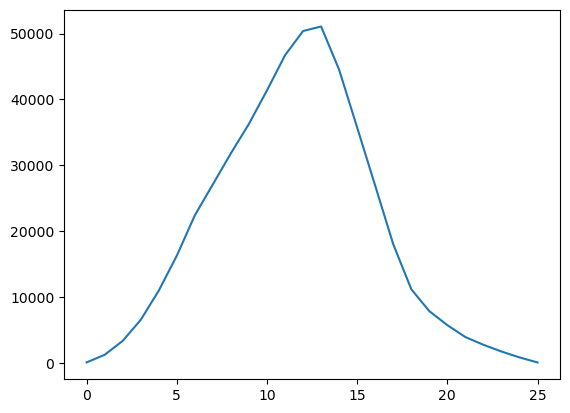

In [14]:
i = 1
print(jd.storms[i].growth_rate)
plt.plot(16*np.array(jd.storms[i].clusters.surfPix_172Wm2))

In [15]:
mean_growth_rate = jd.storm_attributes_on_jdist(['growth_rate'], ['mean'])
max_growth_rate = jd.storm_attributes_on_jdist(['growth_rate'], ['max'])

01

23456789101112131415161718192021222324252627282930313233343536373839404142434445464748495001234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950

In [16]:
mean_growth_rate = mean_growth_rate[0][0,0,:,:]
max_growth_rate = max_growth_rate[0][0,0,:,:]

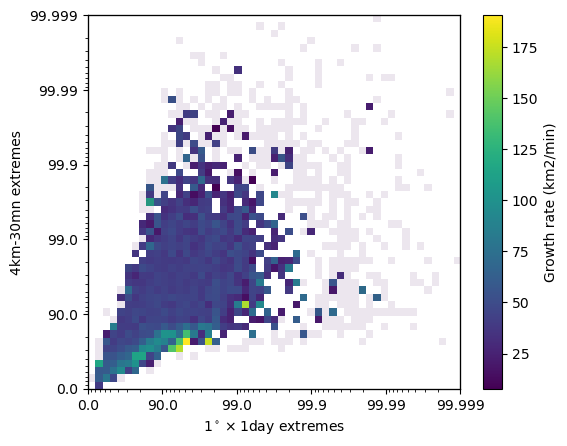

In [17]:
data = mean_growth_rate
jd.plot_data(data, noise, cmap = plt.cm.viridis, branch=False, label = 'Growth rate (km2/min)')

In [130]:
growth_rates = [mcs.growth_rate for mcs in jd.storms]
max_area = [mcs.surfmaxkm2_172Wm2 for mcs in jd.storms]


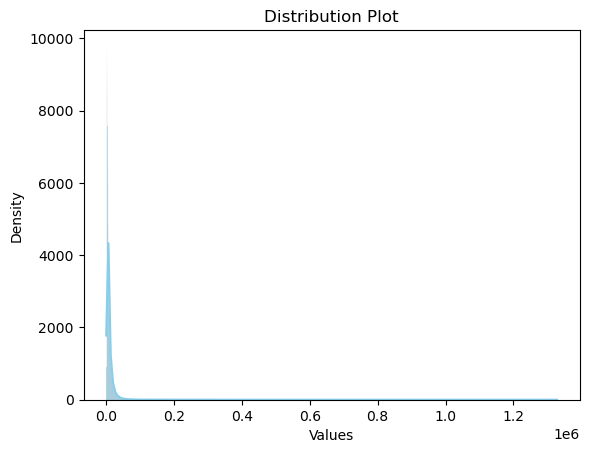

In [131]:
plot_distribution(max_area)

In [102]:
import seaborn as sns
def plot_distribution(data, title='Distribution Plot', xlabel='Values', ylabel='Density'):
    sns.histplot(data, kde=True, color='skyblue', edgecolor='black')  # KDE adds a smoothed curve
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

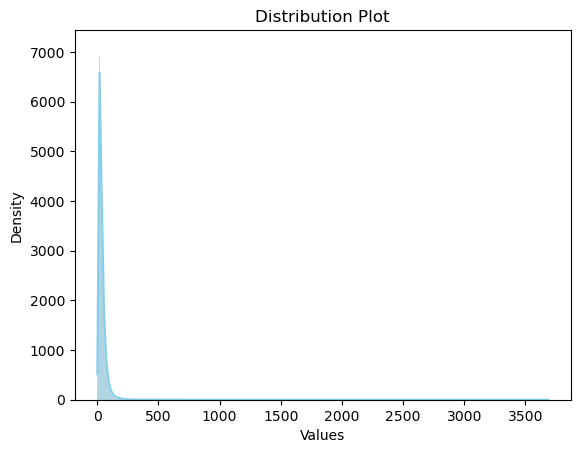

In [103]:
plot_distribution(growth_rates)

In [117]:
index_above_threshold = next((i for i, value in enumerate(growth_rates) if value > 2000), None) # > 3000 : 133858
index_above_threshold

85687

2291.2


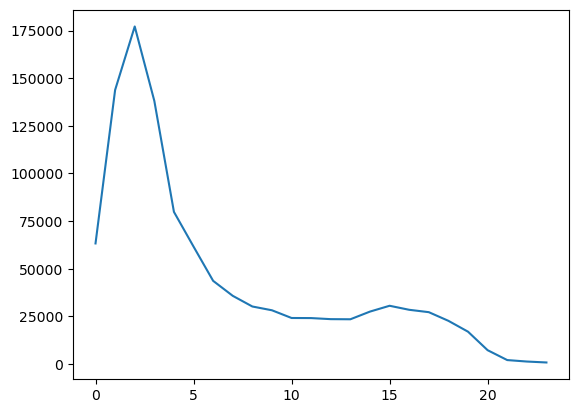

In [129]:
print(jd.storms[85687].growth_rate)
plt.plot(jd.storms[85687].clusters.surfkm2_172Wm2)

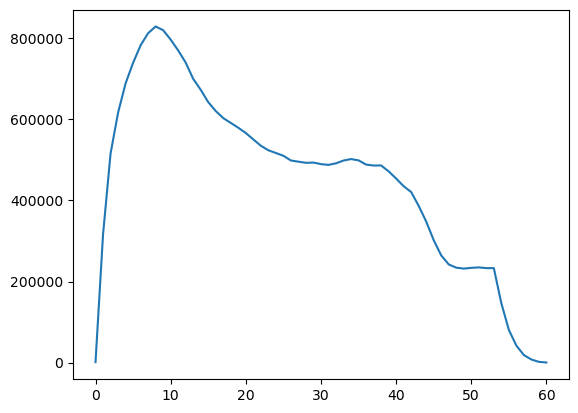

In [128]:
plt.plot(jd.storms[133858].clusters.surfkm2_172Wm2)

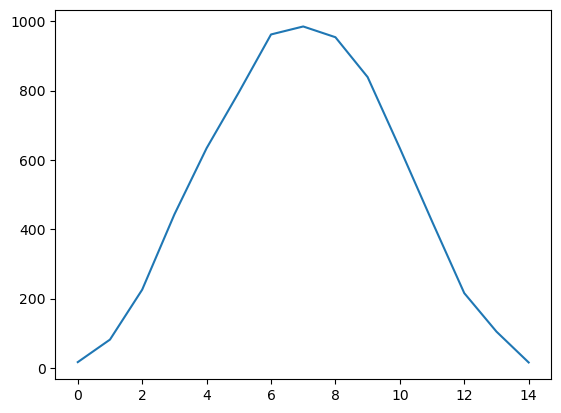

In [122]:
print("")
plt.plot(jd.storms[0].clusters.surfPix_172Wm2)

In [127]:
a = np.array(jd.storms[133858].clusters.surfPix_172Wm2)
b = np.array(jd.storms[133858].clusters.surfkm2_172Wm2)
b/a

array([16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.,
       16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.,
       16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.,
       16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.,
       16., 16., 16., 16., 16., 16., 16., 16., 16.])